In [25]:
import numpy as np
import mne # docu: https://mne.tools/stable/overview/index.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PCIst import pci_st # https://github.com/renzocom/PCIst

import sys
sys.path.append('../')
from src import data

%matplotlib widget

In [26]:
folder = 'external/nieus_tms_eeg_ebrains/derivatives/epochs/'
subject = 'sub-02'

eeg_epoched_data = np.load(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_run-01_epochs.npy'))
metadata = pd.read_csv(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_run-01_channels.tsv'), sep = '\t')
montage = mne.channels.read_custom_montage(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_electrodes.tsv'))
metadata.head()

,high_cutoff,low_cutoff,name,sampling_frequency,status,type,units
0,NaN,0.1,Fp1,725.0,good,EEG,uV
1,NaN,0.1,Fpz,725.0,good,EEG,uV
2,NaN,0.1,Fp2,725.0,good,EEG,uV
3,NaN,0.1,AF3,725.0,good,EEG,uV
4,NaN,0.1,AFz,725.0,good,EEG,uV


Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2538/1334180634.py:3: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2538/1334180634.py:4: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)


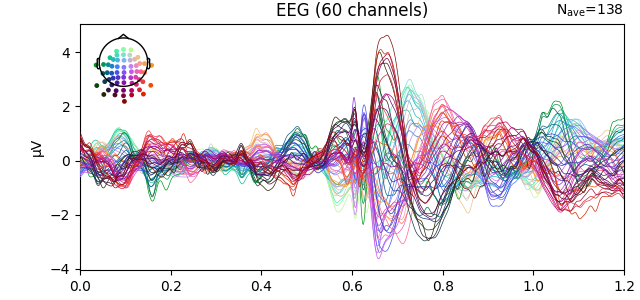

In [27]:
epochs_info = mne.create_info(list(metadata.name), metadata.iloc[0].sampling_frequency)
epochs = mne.EpochsArray(eeg_epoched_data,epochs_info)
epochs.set_channel_types({m:'eeg' for m in metadata.name})
epochs.set_montage(montage)
epochs.average("all").plot();

In [28]:
epochs_data = epochs.get_data() # (n_epochs, n_channels, n_times)
epochs_data_averaged = np.mean(epochs_data,axis=0)

10: 13.090
15: 13.357
20: 13.915
25: 14.096
30: 13.979
35: 14.035
40: 14.128
45: 14.242
50: 14.256
55: 14.288
60: 14.290
65: 14.232
70: 14.428
75: 14.348
80: 14.398


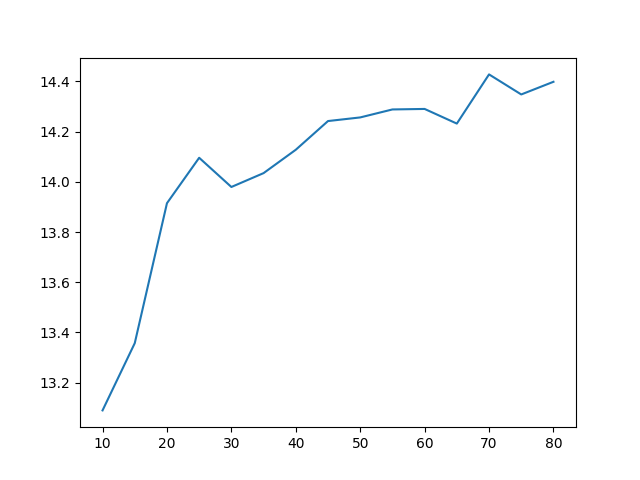

In [29]:
n_steps = []
pci_n_steps = []

for s in range(10,81,5):
    par = {'baseline_window':(0,0.38), 'response_window':(0.4,0.8), 'k':1.2, 'min_snr':1.1, 'max_var':95, 'embed':False,'n_steps':s} # 
    pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
    print(f"{s}: {pci_st_result:.3f}")
    pci_n_steps.append(pci_st_result)
    n_steps.append(s)

plt.figure()
sns.lineplot(x=n_steps, y=pci_n_steps)
plt.show()

1.0: 15.640
1.1: 14.762
1.2: 14.256
1.3: 13.764
1.4: 13.392
1.5: 13.181
1.6: 12.992
1.7: 12.834
1.8: 12.677
1.9: 12.519
2.0: 12.362
2.1: 12.204
2.2: 12.047
2.3: 11.971
2.4: 11.912
2.5: 11.854
2.6: 11.802
2.7: 11.758
2.8: 11.721
2.9: 11.692
3.0: 11.684
3.1: 11.676
3.2: 11.668
3.3: 11.660
3.4: 11.652
3.5: 11.644
3.6: 11.636
3.7: 11.628
3.8: 11.620
3.9: 11.612
4.0: 11.604
4.1: 11.596
4.2: 11.588
4.3: 11.580
4.4: 11.572
4.5: 11.564
4.6: 11.556
4.7: 11.548
4.8: 11.540
4.9: 11.532


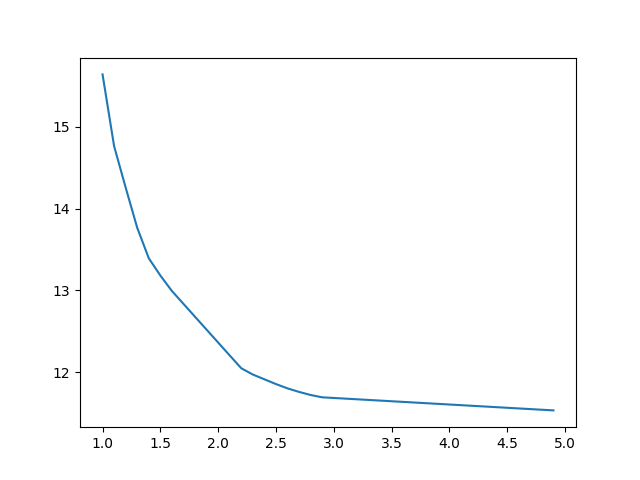

In [30]:
ks = []
pci_k = []

for k10 in range(10,50):
    k = k10/10
    par = {'baseline_window':(0,0.38), 'response_window':(0.4,0.8), 'k':k, 'min_snr':1.1, 'max_var':95, 'embed':False,'n_steps':50} # 
    pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
    print(f"{k}: {pci_st_result:.3f}")
    pci_k.append(pci_st_result)
    ks.append(k)

plt.figure()
sns.lineplot(x=ks, y=pci_k)
plt.show()

90: 10.950
91: 10.950
92: 10.950
93: 10.950
94: 14.256
95: 14.256
96: 14.256
97: 14.256
98: 19.316
99: 30.620


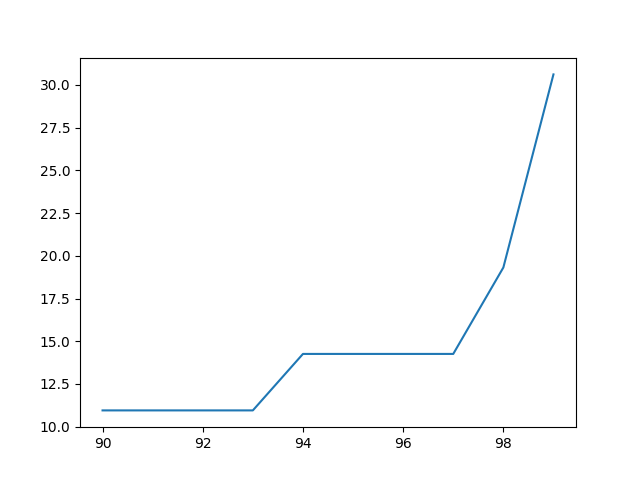

In [31]:
mvs = []
pci_mv = []

for mv in range(90,100):
    par = {'baseline_window':(0,0.38), 'response_window':(0.4,0.8), 'k':1.2, 'min_snr':1.1, 'max_var':mv, 'embed':False,'n_steps':50} # 
    pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
    print(f"{mv}: {pci_st_result:.3f}")
    pci_mv.append(pci_st_result)
    mvs.append(mv)

plt.figure()
sns.lineplot(x=mvs, y=pci_mv)
plt.show()

In [32]:
par = {'baseline_window':(0,0.38), 'response_window':(0.4,0.8), 'k':1.2, 'min_snr':1.1, 'max_var':99, 'embed':False,'n_steps':100} # 
pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
pci_st_result

30.8227560132977

### PCI per subject

Not setting metadata
128 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2538/3795919838.py:13: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2538/3795919838.py:14: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)


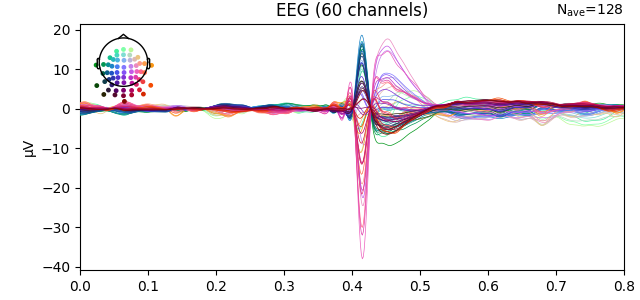

Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2538/3795919838.py:13: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2538/3795919838.py:14: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)


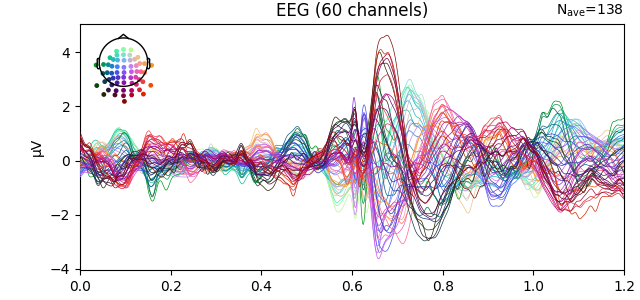

Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2538/3795919838.py:13: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2538/3795919838.py:14: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)


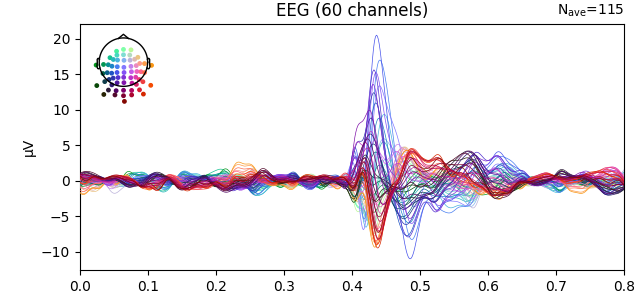

Not setting metadata
162 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2538/3795919838.py:13: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2538/3795919838.py:14: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)


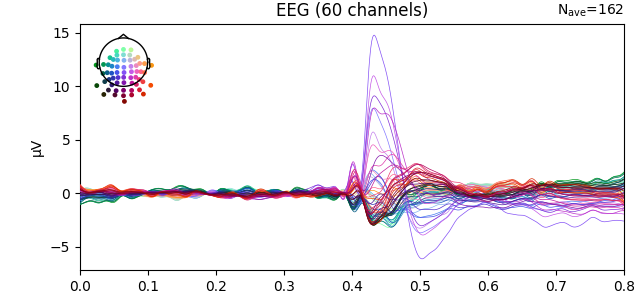

Not setting metadata
201 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2538/3795919838.py:13: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2538/3795919838.py:14: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)
/home/katterrina/fi_muni/0_diplomka/__venv__/lib/python3.10/site-packages/mne/viz/evoked.py:463: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pypl

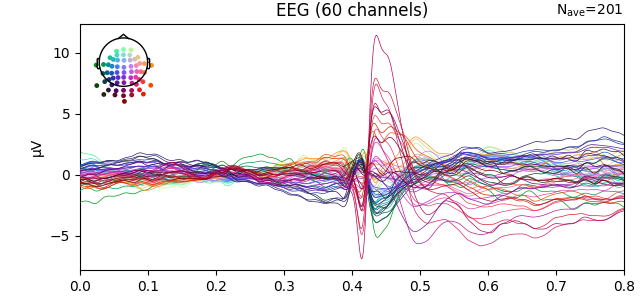

Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_2538/3795919838.py:13: RuntimeWarning: The unit for channel(s) AF3, AF4, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fpz, Fz, Iz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO1, PO2, POz, Pz, T7, T8, TP10, TP7, TP8, TP9 has changed from NA to V.
  epochs.set_channel_types({m:'eeg' for m in metadata.name})
/tmp/ipykernel_2538/3795919838.py:14: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  epochs.set_montage(montage)


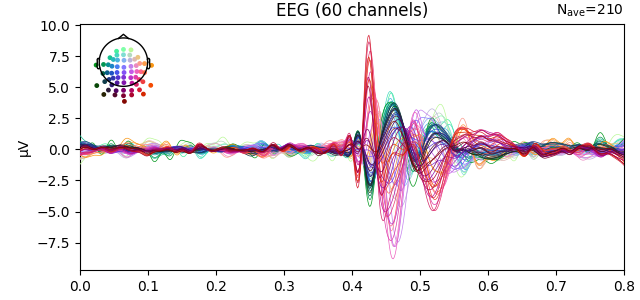

In [33]:
pci_per_subject = {}

for s in range(1,7):
    folder = 'external/nieus_tms_eeg_ebrains/derivatives/epochs/'
    subject = f'sub-0{s}'

    eeg_epoched_data = np.load(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_run-01_epochs.npy'))
    metadata = pd.read_csv(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_run-01_channels.tsv'), sep = '\t')
    montage = mne.channels.read_custom_montage(data.path(folder+f'{subject}/eeg/{subject}_task-tmseeg_electrodes.tsv'))

    epochs_info = mne.create_info(list(metadata.name), metadata.iloc[0].sampling_frequency)
    epochs = mne.EpochsArray(eeg_epoched_data,epochs_info)
    epochs.set_channel_types({m:'eeg' for m in metadata.name})
    epochs.set_montage(montage)
    epochs.average("all").plot();

    epochs_data = epochs.get_data() # (n_epochs, n_channels, n_times)
    epochs_data_averaged = np.mean(epochs_data,axis=0)

    par = {'baseline_window':(0,0.38), 'response_window':(0.4,0.8), 'k':1.2, 'min_snr':1.1, 'max_var':99, 'embed':False,'n_steps':100} # 
    pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)

    pci_per_subject[subject] = pci_st_result


In [42]:
patient_data = pd.read_csv(data.path('external/nieus_tms_eeg_ebrains/participants.tsv'), sep = '\t')
patient_data["PCIst"] = patient_data["participant_id"].map(pci_per_subject)
patient_data

,participant_id,age,sex,diagnosis,etiology,TMS_target,PCIst
0,sub-01,44.5,F,VS,V,frontR,18.809168
1,sub-02,56.7,M,MCS,A,frontL,30.822756
2,sub-03,66.1,F,MCS,V,parietL,39.311997
3,sub-04,57.5,M,VS,A,parietR,18.470220
4,sub-05,56.2,M,VS,T,parietR,13.322792
5,sub-06,24.3,M,MCS,T,parietR,70.629834
